<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


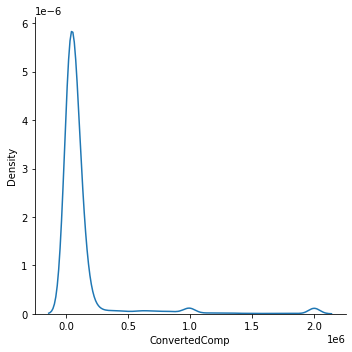

In [9]:
import seaborn as sns
sns.displot(df['ConvertedComp'], kind="kde")

Plot the histogram for the column `ConvertedComp`.


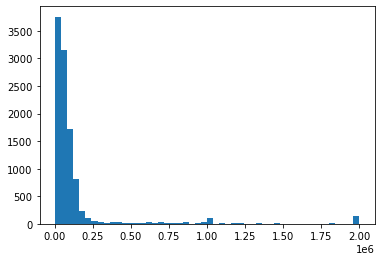

In [15]:
# your code goes here
import matplotlib.pyplot as plt
figure1 = plt.figure()
plt.hist(df['ConvertedComp'], bins = 50)
plt.title=("distribution curve for the column ConvertedComp")
plt.show()

What is the median of the column `ConvertedComp`?


In [16]:
df.ConvertedComp.median()

57745.0

In [3]:
df.Age.median()

29.0

How many responders identified themselves only as a **Man**?


In [24]:
pd.set_option('display.max_rows', None)

In [22]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [23]:
len(df.loc[df['Gender'] == 'Man'])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [25]:
df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


In [7]:
df.Age.describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


Plot a histogram of the column `Age`.


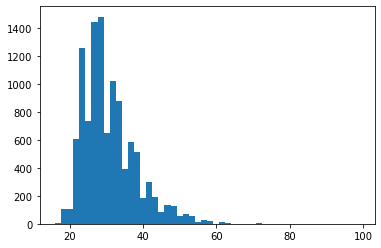

In [6]:
figure1 = plt.figure()
plt.hist(df['Age'], bins = 50)
plt.title=("distribution curve for the column Age")
plt.show()

<AxesSubplot:>

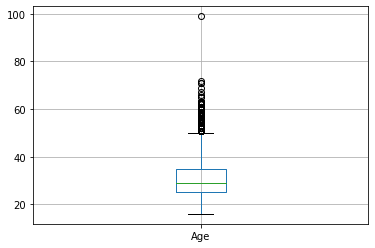

In [4]:
df.boxplot(column=['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

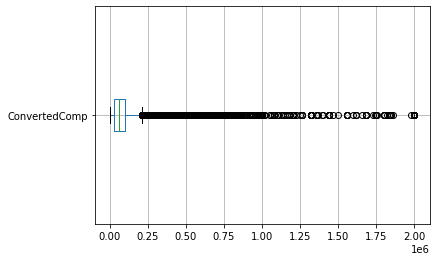

In [9]:
df.boxplot(column=['ConvertedComp'], vert = False)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [6]:
import numpy as np

In [19]:
df.ConvertedComp.isnull().any()

True

In [7]:
q75, q25 = np.nanpercentile(df['ConvertedComp'], [75 ,25])
iqr = q75 - q25
print(iqr)

73132.0


Find out the upper and lower bounds.


In [8]:
# your code goes here
bound = df['ConvertedComp'].max() - df['ConvertedComp'].min()
print(bound)

2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
#A point beyond an inner fence on either side is considered a outlier. lower inner fence: Q25 - 1.5*iqr, upper inner fence: Q3 + 1.5*IQ
lowerfence = q25 - 1.5*iqr
upfence = q75 + 1.5*iqr
print(f"Outliers:{len(df.loc[(df['ConvertedComp'] < lowerfence) | (df['ConvertedComp'] > upfence)])}")

Outliers:879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
print("rows before removing outliers:",df.shape[0])
df1= df.loc[(df['ConvertedComp'] >= lowerfence) & (df['ConvertedComp'] <= upfence)]
print("rows after removing outliers:",df1.shape[0])

rows before removing outliers: 11398
rows after removing outliers: 9703


In [21]:
print(df1['ConvertedComp'].mean())
print(df1['ConvertedComp'].median())

59883.20838915799
52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [24]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
